In [39]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

### Loading the network

In [10]:
network = nx.read_edgelist('data/CA-GrQc.txt', comments='#', delimiter='\t', create_using=None, \
              nodetype=str, data=True, encoding='utf-8')

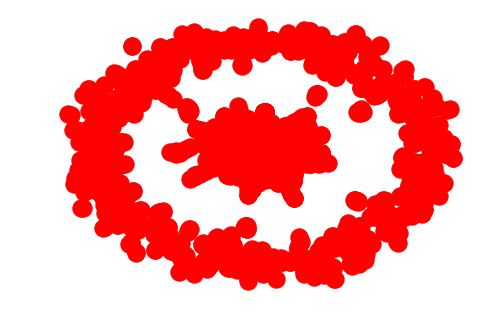

In [11]:
nx.draw(network)
plt.show()

### Graph characteristics 
- number of nodes (=of scientists)
- number of edges (there is one edge between 2 scientists if they have co authored a paper)
- is the graph connected (note: a graph is connected if for all pair of nodes (u, v) there is a path from linking u to v (or from v to u is the directed case))

In [15]:
print('Number of nodes and edges (resp.): {} and {} '.format(network.number_of_nodes(), network.number_of_edges()))

Number of nodes and edges (resp.): 5242 and 14496 


In [16]:
nx.is_connected(network)

False

Since the graph is not connected, let's find the largest connected subgraph

In [21]:
gcc = max(nx.connected_component_subgraphs(network), key=len)
gcc.number_of_nodes()

4158

In [22]:
gcc.number_of_nodes()/network.number_of_nodes()

0.7932086989698588

#### Degree distribution on the graph

In [37]:
degree_sequence = [d for n, d in network.degree()]

In [44]:
print('Elementary statistics: \n mean {} \n median {} \n max {} \n min {} '.format(np.mean(degree_sequence), \
                                                                              np.median(degree_sequence), \
                                                                              np.min(degree_sequence), \
                                                                              np.max(degree_sequence)))

Elementary statistics: 
 mean 5.530713468141931 
 median 3.0 
 max 1 
 min 81 


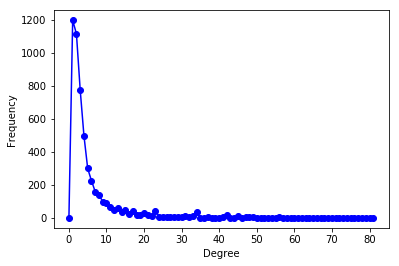

In [45]:
y = nx.degree_histogram(network)
plt.plot(y, 'b-', marker='o')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.show()

Observations: very skewed distribution, most scientists have less than 3 co-authors

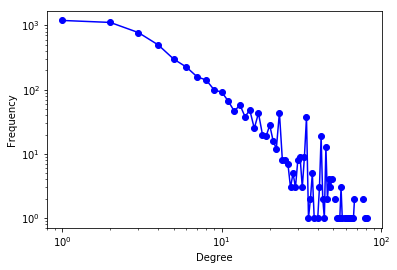

In [47]:
y = nx.degree_histogram(network)
plt.loglog(y, 'b-', marker='o')
plt.ylabel("Frequency")
plt.xlabel("Degree")

plt.draw()
plt.show()

In [ ]:
Observations : something about power law distributions

### Analysis of clustering structures

In [58]:
t = nx.triangles(network)

In [59]:
print('Number of triangles: {} '.format(np.sum(list(t.values()))/3))

Number of triangles: 48260.0 


Let's see how the triangle participation is

In [61]:
t_values = sorted(set(t.values()))
t_histogram = [list(t.values()).count(x) for x in t_values]

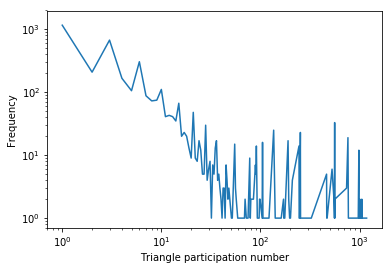

In [62]:
plt.loglog(t_values, t_histogram)
plt.ylabel("Frequency")
plt.xlabel("Triangle participation number")

plt.draw()
plt.show()

In [63]:
#clustering coefficient
nx.average_clustering(network)

0.529635811052136

#### Node centrality measures

In [65]:
#degree centrality
degree_centrality = nx.degree_centrality(network)

#degree centrality
eigen_centrality = nx.eigenvector_centrality(network)

In [66]:
#sort centrality values
sorted_deg_centrality = sorted(degree_centrality.items())
sorted_eig_centrality = sorted(eigen_centrality.items())

In [67]:
#extract centralities
deg_data = [b for a,b in sorted_deg_centrality]
eig_data = [b for a,b in sorted_eig_centrality]

In [68]:
from scipy.stats import pearsonr

print('Pearson coefficient : {}'.format(pearsonr(deg_data, eig_data)))

Pearson coefficient : (0.5955440521255709, 0.0)


#### Repeating the experiment with a random graph

In [71]:
#graph with 100 nodes and probability of an edge is 0.05
random_graph = nx.fast_gnp_random_graph(100, 0.05)

In [74]:
random_degree_sequence = [d for n, d in random_graph.degree()]
print('Elementary statistics: \n mean {} \n median {} \n max {} \n min {} '.format(np.mean(random_degree_sequence), \
                                                                              np.median(random_degree_sequence), \
                                                                              np.max(random_degree_sequence), \
                                                                              np.min(random_degree_sequence)))

Elementary statistics: 
 mean 4.84 
 median 5.0 
 max 12 
 min 1 


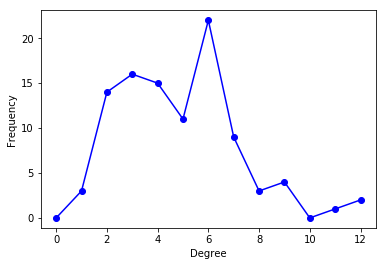

In [76]:
y = nx.degree_histogram(random_graph)
plt.plot(y, 'b-', marker='o')
plt.ylabel("Frequency")
plt.xlabel("Degree")

plt.draw()
plt.show()

Observations: the distribution is much less skewed than for the real network

In [77]:
#clustering coefficient
nx.average_clustering(random_graph)

0.06098845598845597

the clustering coefficient is much lower than for the real network that actually had structures (communities)

### Community detection

In [82]:
G = nx.read_gml('data/karate.gml', label='id')

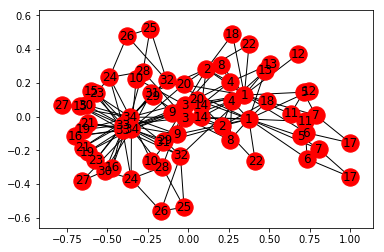

In [84]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos)
plt.show()

In [94]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance

#compute shortest paths
path_length = [p for p in nx.all_pairs_shortest_path_length(G)]

n = G.number_of_nodes()
distances = np.zeros((n, n))


for u, p in path_length:
    for  v, d in p.items():
        distances[int(u)-1][int(v)-1] = d
        
hier = hierarchy.average(distances)

/Users/filament/anaconda/lib/python3.6/site-packages/scipy/cluster/hierarchy.py:323: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='average', metric='euclidean')


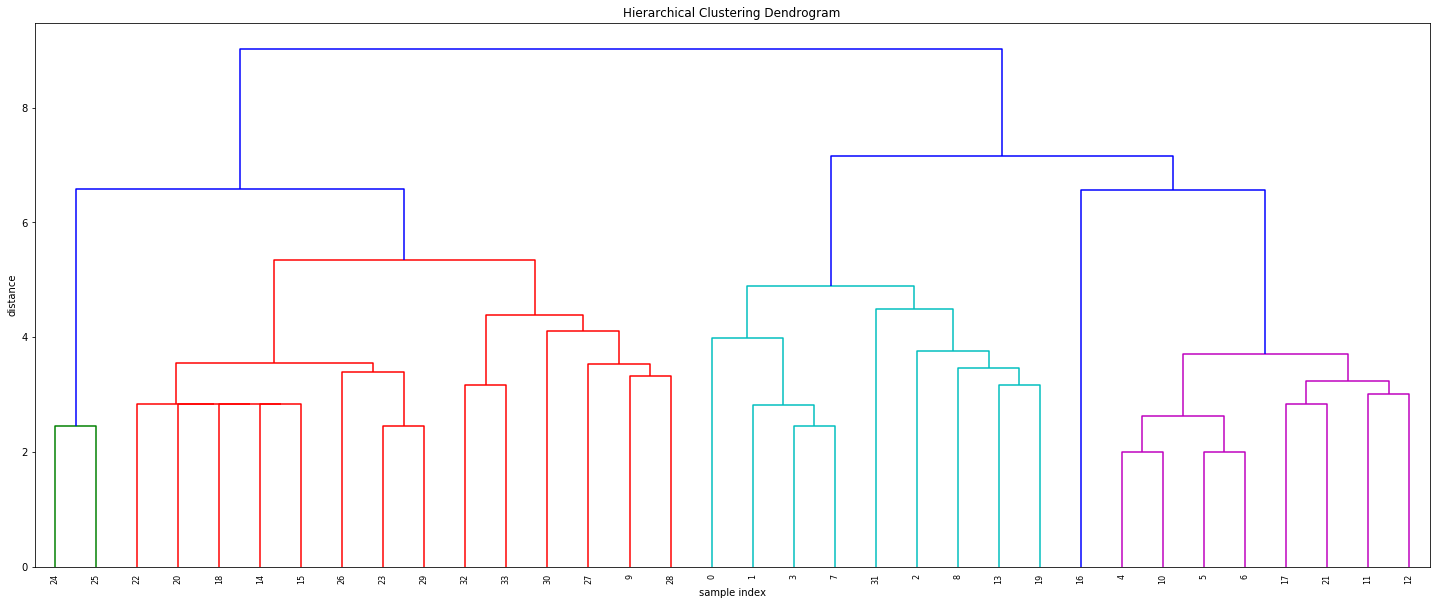

In [109]:
%matplotlib inline
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hierarchy.dendrogram(
    hier,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [ ]:
#compute modularity to assess the quality of the clustering

#test network robustness by deleting a randomly selected node or a targetted node (high degree node)